<a href="https://colab.research.google.com/github/alexandrudaia/AlgoThingsAndHacking/blob/master/SentimentsMasterpynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
#reading the files 
bacovia=pd.read_csv('/content/BacoviaPoezii.txt', delimiter = "\t",
                    engine='python', on_bad_lines='warn')

Skipping line 790: Expected 1 fields in line 790, saw 2


In [ ]:
eminescu=pd.read_csv('/content/EminescuPoezii.txt', delimiter = "\t",
                    engine='python', on_bad_lines='warn')

Skipping line 1587: '	' expected after '"'


In [ ]:
#print first rows int he files
print(bacovia.head(5))

                                          1.Alb
0    Orchestra începu cu-o indignare gratioasă.
1              Salonul alb visa cu roze albe --
2                    Un vals de voaluri albe...
3  Spatiu, infinit, de o tristete armonioasă...
4                    În aurora plină de vioare,


In [ ]:
print(eminescu.head(5))

                                   1.Adio
0            De-acuma nu te-oi mai vedea,
1                   Rămâi, rămâi cu bine!
2                Mă voi feri în calea mea
3                                De tine.
4            De astăzi dar tu fă ce vrei,


In [ ]:
# looking at a few raws lets say last then , will do that with tail(10) function

In [ ]:
data=eminescu.tail(10)
print(data)

                                         1.Adio
4750                 Raspunde Suceava din urma,
4751          Si nimeni nu stie cum tu ai ajuns
4752  Sa stii de ce muntii sageata-ai patruns ­
4753               Si-a codrului cale se curma.
4754           Rasuna pamantul de tropotul des,
4755         De-atatea ostire de munte, de ses,
4756                 Raspunde sunare din nouri;
4757       Cu sunet de bucium la munte si plai,
4758          C-o oaste intreaga calare pe cai.
4759             Cu steaguri cu semne de bouri.


In [ ]:
#as we can see without translation the results are not concludent , lucky
#google deep translator  library has a translation module

In [ ]:
 !pip install deep-translator

     |████████████████████████████████| 128 kB 22.3 MB/s 
  Attempting uninstall: beautifulsoup4
    Found existing installation: beautifulsoup4 4.6.3
    Uninstalling beautifulsoup4-4.6.3:
      Successfully uninstalled beautifulsoup4-4.6.3


In [ ]:
from deep_translator import GoogleTranslator
 
new_text=""
 
for i in data.iloc[4][0].split():
  to_translate=i
 
  new_text=new_text+' '+(GoogleTranslator(source='auto', target='en').translate(to_translate))
 

In [ ]:
pip install vaderSentiment 

     |████████████████████████████████| 125 kB 15.4 MB/s 


In [ ]:
 
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()
vs = analyzer.polarity_scores(new_text)
print("{:-<65} {}".format(new_text, str(vs)))

 Rasuna earth from clatter from,--------------------------------- {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}


In [ ]:
sentences_bacovia=[]

In [ ]:
from time import sleep
from tqdm import tqdm

In [ ]:
for row in range(len(bacovia)):
  if row%50==0 :
    print(row)
  new_text=""
  for i in bacovia.iloc[row][0].split():
    import re
    word = i
    special_char = False
    regexp = re.compile('[^0-9a-zA-Z]+')
    if regexp.search(word):
      special_char = True
    if special_char==False:
      to_translate=i
      new_text=new_text+' '+(GoogleTranslator(source='auto',
                                              target='en').translate(to_translate))
      sentences_bacovia.append(new_text)
 


0
50
100
150
200
250
300
350
400
450
500
550
600
650
700
750
800
850
900
950
1000
1050
1100
1150
1200


In [ ]:
pos=[]
neg=[]
neu=[]
comp=[]
nalyzer = SentimentIntensityAnalyzer()
for sentence in sentences_bacovia:
    vs = analyzer.polarity_scores(sentence)
    print("{:-<65} {}".format(sentence, str(vs)))
    neu.append(vs['neu'])
    neg.append(vs['neg'])
    pos.append(vs['pos'])
    comp.append(vs['compound'])


 Orchestra------------------------------------------------------- {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
 Orchestra indignation------------------------------------------- {'neg': 0.773, 'neu': 0.227, 'pos': 0.0, 'compound': -0.5267}
 Show------------------------------------------------------------ {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
 Show alb-------------------------------------------------------- {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
 Show alb visa--------------------------------------------------- {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
 Show alb visa cu------------------------------------------------ {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
 Show alb visa cu pink------------------------------------------- {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
 Show alb visa cu pink whites------------------------------------ {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
 And----------------------------

In [ ]:
vs

{'compound': 0.0, 'neg': 0.0, 'neu': 1.0, 'pos': 0.0}

In [ ]:
bacovia_sents=pd.DataFrame({'pos':pos,'neg':neg,'neu':neu,'compound':comp})

In [ ]:
bacovia_sents.head(10)

,pos,neg,neu,compound
0,0.0,0.000,1.000,0.0000
1,0.0,0.773,0.227,-0.5267
2,0.0,0.000,1.000,0.0000
3,0.0,0.000,1.000,0.0000
4,0.0,0.000,1.000,0.0000
5,0.0,0.000,1.000,0.0000
6,0.0,0.000,1.000,0.0000
7,0.0,0.000,1.000,0.0000
8,0.0,0.000,1.000,0.0000
9,0.0,0.000,1.000,0.0000


In [ ]:
#creating the target we will encode  bacovia with 
#number 0 and later Eminescu with label /number 1

In [ ]:
bacovia_sents['autor']=[0]*len(bacovia_sents)

In [ ]:
bacovia_sents.head(10)

,pos,neg,neu,compound,autor
0,0.0,0.000,1.000,0.0000,0
1,0.0,0.773,0.227,-0.5267,0
2,0.0,0.000,1.000,0.0000,0
3,0.0,0.000,1.000,0.0000,0
4,0.0,0.000,1.000,0.0000,0
5,0.0,0.000,1.000,0.0000,0
6,0.0,0.000,1.000,0.0000,0
7,0.0,0.000,1.000,0.0000,0
8,0.0,0.000,1.000,0.0000,0
9,0.0,0.000,1.000,0.0000,0


In [ ]:
sentences_eminescu=[]
for row in range(len(eminescu)):
  if row%50==0 :
    print(row)
  new_text=""
  for i in eminescu.iloc[row][0].split():
    import re
    word = i
    special_char = False
    regexp = re.compile('[^0-9a-zA-Z]+')
    if regexp.search(word):
      special_char = True
    if special_char==False:
      to_translate=i
      new_text=new_text+' '+(GoogleTranslator(source='auto',
                                              target='en').translate(to_translate))
      sentences_eminescu.append(new_text)
 


0
50
100
150
200
250
300
350
400
450
500
550
600
650
700
750
800
850
900
950
1000
1050
1100
1150
1200
1250
1300
1350
1400
1450
1500
1550
1600
1650
1700
1750
1800
1850
1900
1950
2000
2050
2100
2150
2200
2250
2300
2350
2400
2450
2500
2550
2600
2650
2700
2750
2800
2850
2900
2950
3000
3050
3100
3150
3200
3250
3300
3350
3400
3450
3500
3550
3600
3650
3700
3750
3800
3850
3900
3950
4000
4050
4100
4150
4200
4250
4300
4350
4400
4450
4500
4550
4600
4650
4700
4750


In [ ]:
#creating sentimentes for Eminescu

In [ ]:
pos=[]
neg=[]
neu=[]
comp=[]
nalyzer = SentimentIntensityAnalyzer()
for sentence in sentences_eminescu:
    vs = analyzer.polarity_scores(sentence)
    print("{:-<65} {}".format(sentence, str(vs)))
    neu.append(vs['neu'])
    neg.append(vs['neg'])
    pos.append(vs['pos'])
    comp.append(vs['compound'])


Streaming output truncated to the last 5000 lines.
 Ciute sprintene from Mountain----------------------------------- {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
 pe-------------------------------------------------------------- {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
 pe lime--------------------------------------------------------- {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
 Cine------------------------------------------------------------ {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
 Cine stay------------------------------------------------------- {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
 Cine stay the--------------------------------------------------- {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
 farmer---------------------------------------------------------- {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
 swill----------------------------------------------------------- {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compo

In [ ]:
eminescu_sents=pd.DataFrame({'pos':pos,'neg':neg,'neu':neu,'compound':comp})

In [ ]:
eminescu_sents.tail(100)

,pos,neg,neu,compound
14206,0.0,0.0,1.0,0.0
14207,0.0,0.0,1.0,0.0
14208,0.0,0.0,1.0,0.0
14209,0.0,0.0,1.0,0.0
14210,0.0,0.0,1.0,0.0
...,...,...,...,...
14301,0.0,0.0,1.0,0.0
14302,0.0,0.0,1.0,0.0
14303,0.0,0.0,1.0,0.0
14304,0.0,0.0,1.0,0.0


In [ ]:
#creating the target column encoding each row from Eminescu author with 1

In [ ]:
eminescu_sents['autor']=[1]*len(eminescu_sents)

In [ ]:
eminescu_sents.head(3)

,pos,neg,neu,compound,autor
0,0.0,0.0,1.0,0.0,1
1,0.0,0.0,1.0,0.0,1
2,0.0,0.0,1.0,0.0,1


In [ ]:
#creating a final dataset for the machine learning model by concatenating both 
#Eminescu and Bacovia data sets with features and target/author

In [ ]:
train=pd.concat([bacovia_sents,eminescu_sents])

In [ ]:
train = train.sample(frac=1).reset_index(drop=True)

In [ ]:
train.head(10)

,pos,neg,neu,compound,autor
0,0.0,0.000,1.000,0.0000,1
1,0.0,0.000,1.000,0.0000,1
2,0.0,0.000,1.000,0.0000,1
3,0.0,0.000,1.000,0.0000,1
4,0.0,0.000,1.000,0.0000,1
5,0.0,0.000,1.000,0.0000,0
6,0.0,0.000,1.000,0.0000,0
7,0.0,0.000,1.000,0.0000,1
8,0.0,0.636,0.364,-0.5423,1
9,0.0,0.000,1.000,0.0000,1


In [ ]:
y=train['autor']

In [ ]:
train=train.drop('autor',axis=1)

In [ ]:
import xgboost as xgb

In [ ]:
from sklearn.model_selection import train_test_split  
from sklearn.metrics import accuracy_score , f1_score
X_train, X_test, y_train, y_test = train_test_split( train, y, test_size=0.33, random_state=121)
 

In [ ]:
model=xgb.XGBClassifier(scale_pos_weight=0.5)
model.fit(X_train,y_train)
pred=model.predict(X_test)
print(accuracy_score(pred,y_test))
print(f1_score(pred,y_test))

0.8632962219383099
0.9265758258994217


In [ ]:
np.unique(pred,return_counts=True)

(array([0, 1]), array([   7, 5472]))

Text(0.5, 0, 'Relative Importance')

<Figure size 432x288 with 0 Axes>

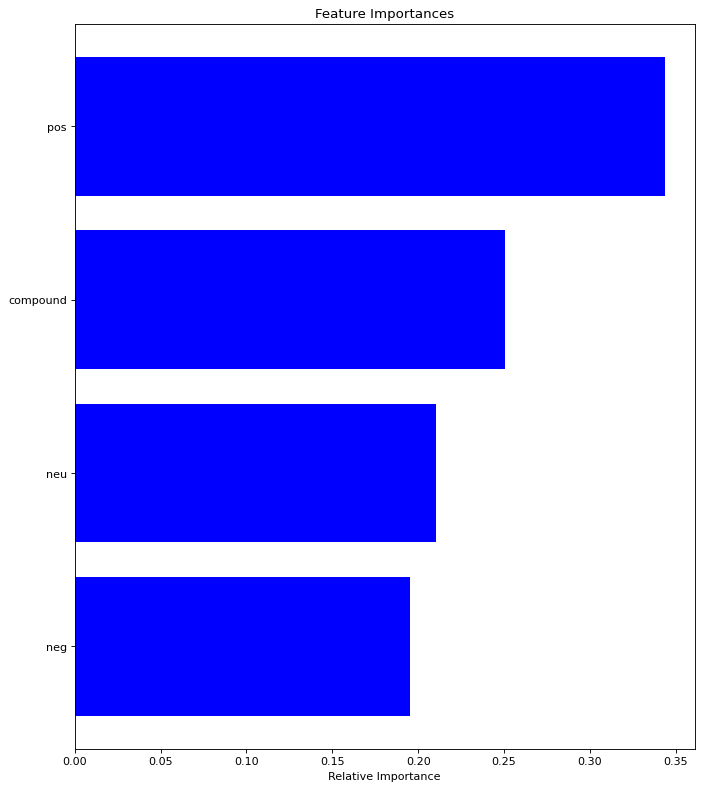

In [ ]:
import matplotlib.pyplot as plt
features=train.columns
importances = model.feature_importances_
indices = np.argsort(importances)

plt.figure(1)
from matplotlib.pyplot import figure
figure(num=None, figsize=(10, 12), dpi=80, facecolor='w', edgecolor='k')
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), features[indices])
plt.xlabel('Relative Importance')

# New Section

In [ ]:
bacovia.columns=['text']
eminescu.columns=['text']

In [ ]:
bacovia['autor']=[0]*len(bacovia)
eminescu['autor']=[1]*len(eminescu)

In [ ]:
eminescu.head(3)

,text,autor
0,"De-acuma nu te-oi mai vedea,",1
1,"Rămâi, rămâi cu bine!",1
2,Mă voi feri în calea mea,1


In [ ]:
train=pd.concat([bacovia,eminescu])

In [ ]:
# Number of words in the row ##
train["num_words"] = train["text"].apply(lambda x: len(str(x).split()))


 

##average og lenght  of  words
train["mean_word_len"] = train["text"].apply(lambda x: 
                                             np.mean([len(w) for 
                                                      
                                                      w in str(x).split()]))


 

train["num_unique_words"] = train["text"].apply(lambda x: 
                                                len(set(str(x).split())))


 
## Number of characters in the row ##
train["num_chars"] = train["text"].apply(lambda x: len(str(x)))


 

from nltk.corpus import stopwords
 
## Number of stopwords in the row ##
#train["num_stopwords"] = train["text"].apply(lambda x: 
#                                             len([w for 
#                                                  w in str(x).lower().split() 
#                                                  if w in eng_stopwords]))

 

import string
## Number of punctuations in the row ##
train["num_punctuations"] =train['text'].apply(lambda x:
                                               len([c for c in str(x) 
                                               if c in string.punctuation]) )


 

## Number of title case words in the row ##
train["num_words_upper"] = train["text"].apply(lambda x:
                                               len([w for w in str(x).split()
                                                if w.isupper()]))


 
## Average length of the words in the row ##
train["mean_word_len"] = train["text"].apply(lambda x:
                                             np.mean([len(w) for 
                                                      w in str(x).split()]))

In [ ]:
train = train.sample(frac=1).reset_index(drop=True)
 

,autor,num_words,mean_word_len,num_unique_words,num_chars,num_punctuations,num_words_upper
0,1,11,3.272727,11,46,0,0
1,1,5,6.400000,5,36,2,0
2,1,4,4.250000,4,20,1,0


In [ ]:
train.head(10)

,autor,num_words,mean_word_len,num_unique_words,num_chars,num_punctuations,num_words_upper
0,1,11,3.272727,11,46,0,0
1,1,5,6.400000,5,36,2,0
2,1,4,4.250000,4,20,1,0
3,1,9,4.222222,9,46,2,0
4,1,7,5.285714,7,43,2,0
5,1,8,5.250000,8,49,3,0
6,1,9,4.777778,7,51,3,0
7,0,3,4.333333,3,15,0,0
8,0,2,9.500000,2,20,2,0
9,0,2,4.000000,2,9,0,0


In [ ]:
train=train.drop('text',axis=1)

In [ ]:
y=train['autor']
train=train.drop('autor',axis=1)

In [ ]:
from sklearn.model_selection import train_test_split  
from sklearn.metrics import accuracy_score , f1_score
X_train, X_test, y_train, y_test = train_test_split( train, y, test_size=0.33, random_state=121)
 

In [ ]:
model=xgb.XGBClassifier(scale_pos_weight=0.5)
model.fit(X_train,y_train)
pred=model.predict(X_test)
print(accuracy_score(pred,y_test))
print(f1_score(pred,y_test))

0.833502538071066
0.8976918278228323


In [ ]:
np.unique(pred,return_counts=True)

(array([0, 1]), array([ 357, 1613]))

Text(0.5, 0, 'Relative Importance')

<Figure size 432x288 with 0 Axes>

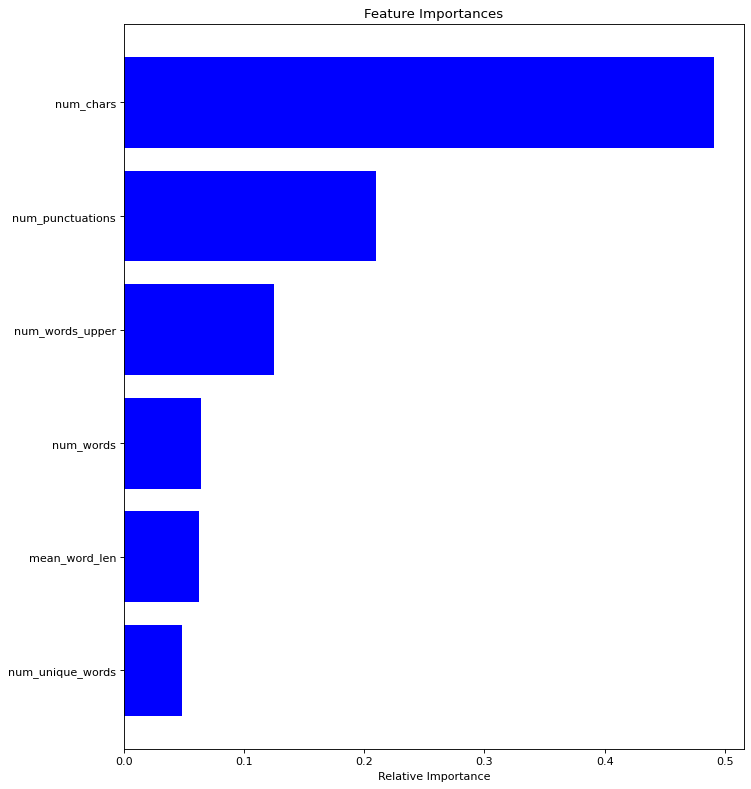

In [ ]:
import matplotlib.pyplot as plt
features=train.columns
importances = model.feature_importances_
indices = np.argsort(importances)

plt.figure(1)
from matplotlib.pyplot import figure
figure(num=None, figsize=(10, 12), dpi=80, facecolor='w', edgecolor='k')
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), features[indices])
plt.xlabel('Relative Importance')

In [ ]:
bacovia_sents

,pos,neg,neu,compound,autor
0,0.0,0.000,1.000,0.0000,0
1,0.0,0.773,0.227,-0.5267,0
2,0.0,0.000,1.000,0.0000,0
3,0.0,0.000,1.000,0.0000,0
4,0.0,0.000,1.000,0.0000,0
...,...,...,...,...,...
2290,0.0,0.000,1.000,0.0000,0
2291,0.0,0.000,1.000,0.0000,0
2292,0.0,0.000,1.000,0.0000,0
2293,0.0,0.000,1.000,0.0000,0


In [ ]:
sentences_bacovia

[' Orchestra',
 ' Orchestra indignation',
 ' Show',
 ' Show alb',
 ' Show alb visa',
 ' Show alb visa cu',
 ' Show alb visa cu pink',
 ' Show alb visa cu pink whites',
 ' And',
 ' And vals',
 ' And vals from',
 ' And vals from veils',
 ' from',
 ' from o',
 ' from o sadness',
 ' aurora',
 ' aurora from',
 ' Ball',
 ' Ball alb',
 ' Ball alb refreshes',
 ' Ball alb refreshes pe',
 ' clare',
 ' from',
 ' from time',
 ' The man',
 ' all',
 ' all se',
 ' all se SHADOWS',
 ' And',
 ' And cer',
 ' And cer from',
 ' And cer from plumb',
 ' And cer from plumb ever',
 ' And',
 ' And brains',
 ' And brains burned',
 ' And brains burned ca',
 ' And brains burned ca from',
 ' wilderness',
 ' wilderness until',
 ' wilderness until May',
 ' wilderness until May larg',
 ' the night',
 ' the night his',
 ' the night his anything',
 ' from',
 ' from cu',
 ' from cu forehead',
 ' The man',
 ' Ca',
 ' Ca tears',
 ' Ca tears mari',
 ' Ca tears mari from',
 ' flow',
 ' flow leaves',
 ' flow leaves from',
 '

In [ ]:
import sys
# !{sys.executable} -m spacy download en
import re, numpy as np, pandas as pd
from pprint import pprint

# Gensim
import gensim, spacy, logging, warnings
import gensim.corpora as corpora
from gensim.utils import lemmatize, simple_preprocess
from gensim.models import CoherenceModel
import matplotlib.pyplot as plt

# NLTK Stop words
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stop_words = stopwords.words('english')
stop_words.extend(['from', 'subject', 're', 'edu', 'use', 'not', 'would', 'say',
                   'could', '_', 'be', 'know', 'good', 'go', 'get', 'do', 'done', 'try', 'many',
                   'some', 'nice', 'thank', 'think', 'see', 'rather', 'easy', 'easily', 'lot', 'lack', 
                   'make', 'want', 'seem', 'run', 'need', 'even', 'right', 'line', 'even', 'also', 'may', 'take', 'come',
                   'și', 'nici', 'de', 'sau', 'ori', 'dacă', 'fiindcă', 'iar', 'dar', 'însă', 'ci', 'deci', 'că', 'să', 
                   'ca să', 'căci', 'deși', 'încât', 'deoarece',
                   'a', 'pe', 'la', 'spre', 'cu', 'de', 'fără', 'sub', 'în', 'prin', 'pentru', 'către', 'contra', 'lângă', 'de la', 'de lângă',
                   'dinspre', 'despre', 'de către', 'deasupra', 'împrejurul', 'împotriva', 'înaintea'])

%matplotlib inline
warnings.filterwarnings("ignore",category=DeprecationWarning)
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.ERROR)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
def sent_to_words(sentences):
    for sent in sentences:       
        sent = re.sub('\"', "", sent)  # remove single quotes
        sent = gensim.utils.simple_preprocess(str(sent), deacc=True) 
        yield(sent)  

In [ ]:
data=sentences_bacovia

In [ ]:
 # Build the bigram and trigram models
data_words = list(sent_to_words(data))
bigram = gensim.models.Phrases(data_words, min_count=5, threshold=100) # higher threshold fewer phrases.
trigram = gensim.models.Phrases(bigram[data_words], threshold=100)  
bigram_mod = gensim.models.phrases.Phraser(bigram)
trigram_mod = gensim.models.phrases.Phraser(trigram)

 !python3 -m spacy download en  # run in terminal once
def process_words(texts, stop_words=stop_words, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV']):
    """Remove Stopwords, Form Bigrams, Trigrams and Lemmatization"""
    texts = [[word for word in simple_preprocess(str(doc)) if word not in stop_words] for doc in texts]
    texts = [bigram_mod[doc] for doc in texts]
    texts = [trigram_mod[bigram_mod[doc]] for doc in texts]
    texts_out = []
    nlp = spacy.load('en', disable=['parser', 'ner'])
    for sent in texts:
        doc = nlp(" ".join(sent)) 
        texts_out.append([token.lemma_ for token in doc if token.pos_ in allowed_postags])
    # remove stopwords once more after lemmatization
    texts_out = [[word for word in simple_preprocess(str(doc)) if word not in stop_words] for doc in texts_out]    
    return texts_out

data_ready = process_words(data_words)  # processed Text Data!

/usr/local/lib/python3.7/dist-packages/gensim/models/phrases.py:598: UserWarning: For a faster implementation, use the gensim.models.phrases.Phraser class
  warnings.warn("For a faster implementation, use the gensim.models.phrases.Phraser class")


In [ ]:
 # Create Dictionary
id2word = corpora.Dictionary(data_ready)

# Create Corpus: Term Document Frequency
corpus = [id2word.doc2bow(text) for text in data_ready]

# Build LDA model FOR BACOVIA
lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                           id2word=id2word,
                                           num_topics=5, 
                                           random_state=100,
                                           update_every=1,
                                           chunksize=10,
                                           passes=10,
                                           alpha='symmetric',
                                           iterations=100,
                                           per_word_topics=True)

pprint(lda_model.print_topics())

[(0,
  '0.139*"pass" + 0.109*"time" + 0.079*"ghost" + 0.078*"pot" + 0.048*"speak" + '
  '0.043*"world" + 0.039*"circle" + 0.039*"common" + 0.029*"quick" + '
  '0.027*"former"'),
 (1,
  '0.152*"snow" + 0.121*"year" + 0.089*"pe" + 0.066*"always" + 0.059*"butter" '
  '+ 0.052*"rece" + 0.052*"sad" + 0.043*"great" + 0.027*"stay" + 0.012*"warm"'),
 (2,
  '0.080*"string" + 0.069*"height" + 0.065*"agent" + 0.063*"riddle" + '
  '0.052*"thing" + 0.048*"warm" + 0.048*"shock" + 0.039*"room" + 0.039*"naked" '
  '+ 0.026*"vise"'),
 (3,
  '0.136*"shock" + 0.093*"window" + 0.087*"fal" + 0.044*"age" + 0.042*"circle" '
  '+ 0.031*"duce" + 0.029*"chamber" + 0.027*"speak" + 0.021*"appear" + '
  '0.020*"violin"'),
 (4,
  '0.118*"night" + 0.088*"day" + 0.078*"cu" + 0.068*"today" + 0.060*"riddle" + '
  '0.043*"flow" + 0.040*"point" + 0.040*"income" + 0.040*"face" + '
  '0.032*"crop"')]


In [ ]:
data=sentences_eminescu

In [ ]:
 # Build the bigram and trigram models
data_words = list(sent_to_words(data))
bigram = gensim.models.Phrases(data_words, min_count=5, threshold=100) # higher threshold fewer phrases.
trigram = gensim.models.Phrases(bigram[data_words], threshold=100)  
bigram_mod = gensim.models.phrases.Phraser(bigram)
trigram_mod = gensim.models.phrases.Phraser(trigram)

 !python3 -m spacy download en  # run in terminal once
def process_words(texts, stop_words=stop_words, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV']):
    """Remove Stopwords, Form Bigrams, Trigrams and Lemmatization"""
    texts = [[word for word in simple_preprocess(str(doc)) if word not in stop_words] for doc in texts]
    texts = [bigram_mod[doc] for doc in texts]
    texts = [trigram_mod[bigram_mod[doc]] for doc in texts]
    texts_out = []
    nlp = spacy.load('en', disable=['parser', 'ner'])
    for sent in texts:
        doc = nlp(" ".join(sent)) 
        texts_out.append([token.lemma_ for token in doc if token.pos_ in allowed_postags])
    # remove stopwords once more after lemmatization
    texts_out = [[word for word in simple_preprocess(str(doc)) if word not in stop_words] for doc in texts_out]    
    return texts_out

data_ready = process_words(data_words)  # processed Text Data!

/usr/local/lib/python3.7/dist-packages/gensim/models/phrases.py:598: UserWarning: For a faster implementation, use the gensim.models.phrases.Phraser class
  warnings.warn("For a faster implementation, use the gensim.models.phrases.Phraser class")


     |████████████████████████████████| 12.0 MB 15.4 MB/s 
✔ Download and installation successful
You can now load the model via spacy.load('en_core_web_sm')
✔ Linking successful
/usr/local/lib/python3.7/dist-packages/en_core_web_sm -->
/usr/local/lib/python3.7/dist-packages/spacy/data/en
You can now load the model via spacy.load('en')


In [ ]:
 # Create Dictionary
id2word = corpora.Dictionary(data_ready)

# Create Corpus: Term Document Frequency
corpus = [id2word.doc2bow(text) for text in data_ready]

# Build LDA model FOR EMINESCU
lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                           id2word=id2word,
                                           num_topics=5, 
                                           random_state=100,
                                           update_every=1,
                                           chunksize=10,
                                           passes=10,
                                           alpha='symmetric',
                                           iterations=100,
                                           per_word_topics=True)

pprint(lda_model.print_topics())

/usr/local/lib/python3.7/dist-packages/gensim/models/ldamodel.py:804: RuntimeWarning: divide by zero encountered in double_scalars
  perwordbound = self.bound(chunk, subsample_ratio=subsample_ratio) / (subsample_ratio * corpus_words)


[(0,
  '0.125*"ca" + 0.088*"lose" + 0.059*"building" + 0.047*"chip" + 0.047*"stir" '
  '+ 0.039*"raze" + 0.032*"milker" + 0.029*"afloat" + 0.027*"call" + '
  '0.026*"tale"'),
 (1,
  '0.316*"thing" + 0.093*"pe" + 0.080*"mind" + 0.040*"pare" + 0.038*"search" + '
  '0.035*"pass" + 0.029*"wood" + 0.022*"tear" + 0.022*"pain" + 0.018*"rose"'),
 (2,
  '0.097*"today" + 0.096*"world" + 0.070*"vain" + 0.052*"soul" + 0.051*"cat" + '
  '0.050*"year" + 0.043*"dream" + 0.041*"rest" + 0.033*"mountain" + '
  '0.029*"everywhere"'),
 (3,
  '0.119*"night" + 0.088*"look" + 0.064*"drop" + 0.061*"mark" + 0.060*"heart" '
  '+ 0.053*"black" + 0.039*"tall" + 0.039*"crown" + 0.034*"army" + '
  '0.033*"death"'),
 (4,
  '0.243*"cu" + 0.080*"watch" + 0.070*"name" + 0.070*"eye" + 0.067*"sound" + '
  '0.038*"former" + 0.037*"jind" + 0.032*"summit" + 0.030*"rece" + '
  '0.020*"front"')]


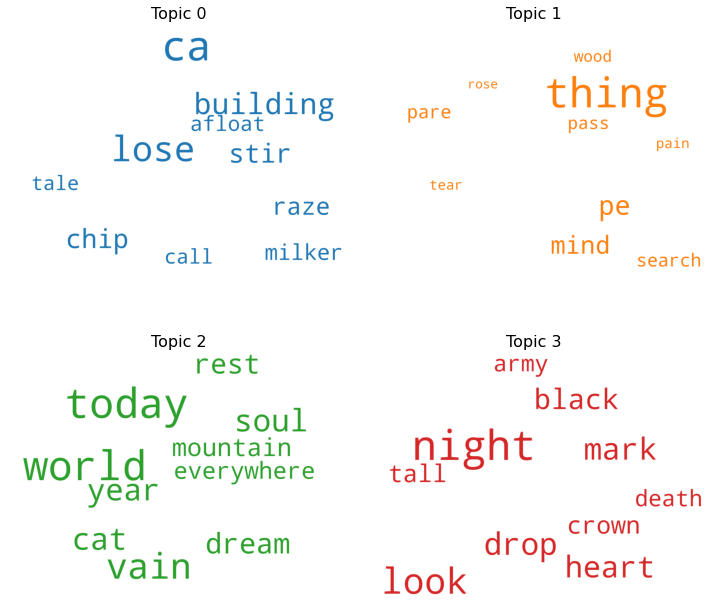

In [ ]:
from matplotlib import pyplot as plt
from wordcloud import WordCloud, STOPWORDS
import matplotlib.colors as mcolors

cols = [color for name, color in mcolors.TABLEAU_COLORS.items()]  # more colors: 'mcolors.XKCD_COLORS'

cloud = WordCloud(stopwords=stop_words,
                  background_color='white',
                  width=2500,
                  height=1800,
                  max_words=10,
                  colormap='tab10',
                  color_func=lambda *args, **kwargs: cols[i],
                  prefer_horizontal=1.0)

topics = lda_model.show_topics(formatted=False)

fig, axes = plt.subplots(2, 2, figsize=(10,10), sharex=True, sharey=True)

for i, ax in enumerate(axes.flatten()):
    fig.add_subplot(ax)
    topic_words = dict(topics[i][1])
    cloud.generate_from_frequencies(topic_words, max_font_size=300)
    plt.gca().imshow(cloud)
    plt.gca().set_title('Topic ' + str(i), fontdict=dict(size=16))
    plt.gca().axis('off')


plt.subplots_adjust(wspace=0, hspace=0)
plt.axis('off')
plt.margins(x=0, y=0)
plt.tight_layout()
plt.show()

In [ ]:
data=sentences_bacovia

In [ ]:
 # Build the bigram and trigram models
data_words = list(sent_to_words(data))
bigram = gensim.models.Phrases(data_words, min_count=5, threshold=100) # higher threshold fewer phrases.
trigram = gensim.models.Phrases(bigram[data_words], threshold=100)  
bigram_mod = gensim.models.phrases.Phraser(bigram)
trigram_mod = gensim.models.phrases.Phraser(trigram)

 !python3 -m spacy download en  # run in terminal once
def process_words(texts, stop_words=stop_words, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV']):
    """Remove Stopwords, Form Bigrams, Trigrams and Lemmatization"""
    texts = [[word for word in simple_preprocess(str(doc)) if word not in stop_words] for doc in texts]
    texts = [bigram_mod[doc] for doc in texts]
    texts = [trigram_mod[bigram_mod[doc]] for doc in texts]
    texts_out = []
    nlp = spacy.load('en', disable=['parser', 'ner'])
    for sent in texts:
        doc = nlp(" ".join(sent)) 
        texts_out.append([token.lemma_ for token in doc if token.pos_ in allowed_postags])
    # remove stopwords once more after lemmatization
    texts_out = [[word for word in simple_preprocess(str(doc)) if word not in stop_words] for doc in texts_out]    
    return texts_out

data_ready = process_words(data_words)  # processed Text Data!

/usr/local/lib/python3.7/dist-packages/gensim/models/phrases.py:598: UserWarning: For a faster implementation, use the gensim.models.phrases.Phraser class
  warnings.warn("For a faster implementation, use the gensim.models.phrases.Phraser class")


     |████████████████████████████████| 12.0 MB 5.4 MB/s 
✔ Download and installation successful
You can now load the model via spacy.load('en_core_web_sm')
✔ Linking successful
/usr/local/lib/python3.7/dist-packages/en_core_web_sm -->
/usr/local/lib/python3.7/dist-packages/spacy/data/en
You can now load the model via spacy.load('en')


In [ ]:
 # Create Dictionary
id2word = corpora.Dictionary(data_ready)

# Create Corpus: Term Document Frequency
corpus = [id2word.doc2bow(text) for text in data_ready]

# Build LDA model FOR EMINESCU
lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                           id2word=id2word,
                                           num_topics=5, 
                                           random_state=100,
                                           update_every=1,
                                           chunksize=10,
                                           passes=10,
                                           alpha='symmetric',
                                           iterations=100,
                                           per_word_topics=True)

pprint(lda_model.print_topics())

[(0,
  '0.139*"pass" + 0.109*"time" + 0.079*"ghost" + 0.078*"pot" + 0.048*"speak" + '
  '0.043*"world" + 0.039*"circle" + 0.039*"common" + 0.029*"quick" + '
  '0.027*"former"'),
 (1,
  '0.152*"snow" + 0.121*"year" + 0.089*"pe" + 0.066*"always" + 0.059*"butter" '
  '+ 0.052*"rece" + 0.052*"sad" + 0.043*"great" + 0.027*"stay" + 0.012*"warm"'),
 (2,
  '0.080*"string" + 0.069*"height" + 0.065*"agent" + 0.063*"riddle" + '
  '0.052*"thing" + 0.048*"warm" + 0.048*"shock" + 0.039*"room" + 0.039*"naked" '
  '+ 0.026*"vise"'),
 (3,
  '0.136*"shock" + 0.093*"window" + 0.087*"fal" + 0.044*"age" + 0.042*"circle" '
  '+ 0.031*"duce" + 0.029*"chamber" + 0.027*"speak" + 0.021*"appear" + '
  '0.020*"violin"'),
 (4,
  '0.118*"night" + 0.088*"day" + 0.078*"cu" + 0.068*"today" + 0.060*"riddle" + '
  '0.043*"flow" + 0.040*"point" + 0.040*"income" + 0.040*"face" + '
  '0.032*"crop"')]


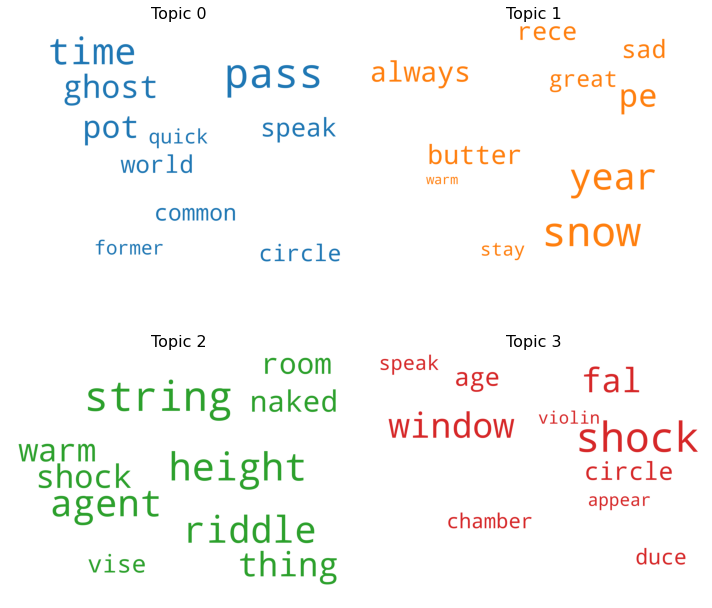

In [ ]:
from matplotlib import pyplot as plt
from wordcloud import WordCloud, STOPWORDS
import matplotlib.colors as mcolors

cols = [color for name, color in mcolors.TABLEAU_COLORS.items()]  # more colors: 'mcolors.XKCD_COLORS'

cloud = WordCloud(stopwords=stop_words,
                  background_color='white',
                  width=2500,
                  height=1800,
                  max_words=10,
                  colormap='tab10',
                  color_func=lambda *args, **kwargs: cols[i],
                  prefer_horizontal=1.0)

topics = lda_model.show_topics(formatted=False)

fig, axes = plt.subplots(2, 2, figsize=(10,10), sharex=True, sharey=True)

for i, ax in enumerate(axes.flatten()):
    fig.add_subplot(ax)
    topic_words = dict(topics[i][1])
    cloud.generate_from_frequencies(topic_words, max_font_size=300)
    plt.gca().imshow(cloud)
    plt.gca().set_title('Topic ' + str(i), fontdict=dict(size=16))
    plt.gca().axis('off')


plt.subplots_adjust(wspace=0, hspace=0)
plt.axis('off')
plt.margins(x=0, y=0)
plt.tight_layout()
plt.show()

In [ ]:
!pip3 install  pyLDAvis

In [ ]:
 !pip install pyLDAvis.gensim_models

ERROR: Could not find a version that satisfies the requirement pyLDAvis.gensim_models (from versions: none)
ERROR: No matching distribution found for pyLDAvis.gensim_models


In [ ]:
import pyLDAvis.gensim_models
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim_models.prepare(lda_model, corpus, dictionary=lda_model.id2word)
vis

/usr/local/lib/python3.7/dist-packages/pyLDAvis/_prepare.py:247: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  by='saliency', ascending=False).head(R).drop('saliency', 1)


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
2     -0.014805  0.083772       1        1  22.760080
4      0.048609  0.225438       2        1  20.852966
1     -0.260543 -0.071108       3        1  19.436407
3      0.052566 -0.108763       4        1  19.007436
0      0.174174 -0.129339       5        1  17.943111, topic_info=      Term       Freq      Total Category  logprob  loglift
139   snow  37.000000  37.000000  Default  30.0000  30.0000
34    pass  31.000000  31.000000  Default  29.0000  29.0000
18   night  31.000000  31.000000  Default  28.0000  28.0000
325  shock  46.000000  46.000000  Default  27.0000  27.0000
42    year  30.000000  30.000000  Default  26.0000  26.0000
..     ...        ...        ...      ...      ...      ...
78    name   0.458222   1.341881   Topic5  -6.1853   0.6435
299   crop   4.276122  13.120475   Topic5  -3.9519   0.5968
154   poet   0.358326   1.242013   Topic5  -6.4312   0.4749
219   full   0.339719   1.223555   Topic5  -6.4845   0.4366
43    lead   1.237930   5.177677   Topic5  -5.1915   0.2870

[196 rows x 6 columns], token_table=      Topic      Freq       Term
term                            
292       4  0.884408        age
318       1  0.927883      agent
310       1  0.929032  agreement
260       3  0.949167     always
251       2  0.743289    ancient
...     ...       ...        ...
45        2  0.543175      woman
158       4  0.492694       word
279       5  0.605241     worker
32        5  0.947802      world
42        3  0.954341       year

[141 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[3, 5, 2, 4, 1])

In [ ]:
import pyLDAvis.gensim_models

In [ ]:
# the most interesting part of my research was that  I have used as features/ predictors for the machine learning classifier the
#following patterns extracted from text :

#.........................list of patterns --------------


# We have trained the machine learning classifier  and we obtained after several runs the following accuracy on the random test dataset
#For the machine learning classifier we have choosed  xgboost model wich is ..... detalii despre xgboost
#I have done also clustering  and topic modeling using LDA ( LATENT  DIRICHLE ALLOCATION ) .... detalii despre LDA
#As seen in the 4 topics / clusters   we can observe that .......... comenntezii cele 4 clustere / topice , cu cat fontul e mai mare cu atat cuvantul 
#are o importanta mai mare in text si e mai dominant  , cu cat e mai mic are importanta mai mica
#In conclusion regarding the classification part  we have obtained an pretty accurate model given the patterns from text , meaning that using machine 
#learning  and this kind of featutres we can clasify wich  text is from wich author .
#Also we have obtained the importance of  predictors  as follow :
#Regarding the topic modeling we have managed to obtain topics / clusters that indicates in decreasing order the most dominant  words of a particular topic